<a href="https://colab.research.google.com/github/YABIGAIL23/INVESTIGACI-N-DE-OPERACIONES/blob/main/Modelo_de_Redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Modelo de Redes

Un modelo de red es un modelo de transbordo con capacidades, el cual puede adoptar diversas formas, como el modelo de la ruta más corta y el modelo del  flujo máximo y mínimo, el problema de árbol de alcance mínimo, método de camino crítico, entre otras aplicaciones de la planeación financiera y de producción.

#Grafo

Es una colección de nodos (vertices) junto con identificados pares de nodos (llamados bordes, enlaces, etc.).

 En NetworkX, los nodos pueden ser cualquier objeto con, por ejemplo, una cadena de texto, una imagen, un objeto XML, otro gráfico, un objeto nodo personalizado, etc.

Ejemplo

In [99]:
import networkx as nx #Libreria

NetworkX es una biblioteca de Python para el estudio de grafos y análisis de redes.

**Creacion de un Grafo**

In [100]:
#Crear un grafo vacío (no dirigido por defecto)
G = nx.Graph()

**Añadir nodos**

<font color="red"></font>


In [101]:
#Añadir un nodo individual
G.add_node(1)

#Añadir múltiples nodos desde una lista
G.add_nodes_from([2, 3])

#Añadir nodos con atributos (usando tuplas)
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"})
])

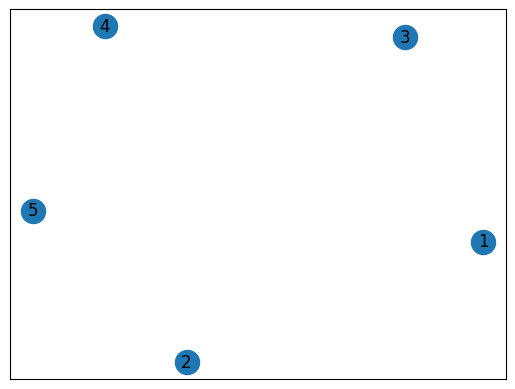

In [102]:
nx.draw_networkx(G)

In [103]:
#Añadir nodos desde otro grafo
H = nx.path_graph(10)  #Grafo camino con 10 nodos
G.add_nodes_from(H)

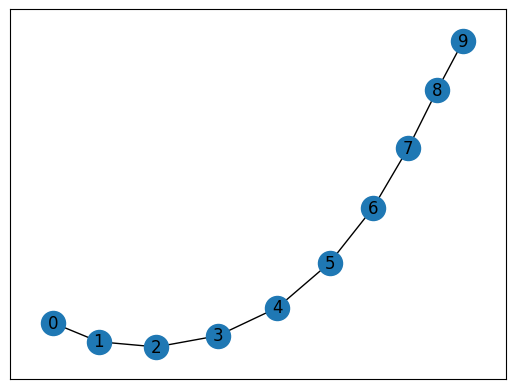

In [104]:
nx.draw_networkx(H)

**Añadir aristas**

In [105]:
#Añadir una arista individual
G.add_edge(1, 2)

#Añadir aristas desde una lista de tuplas
G.add_edges_from([(1, 2), (1, 3)])

#Añadir aristas desde otro grafo
G.add_edges_from(H.edges)

#Añadir aristas con atributos
G.add_edge(2, 3, weight=3.1415)

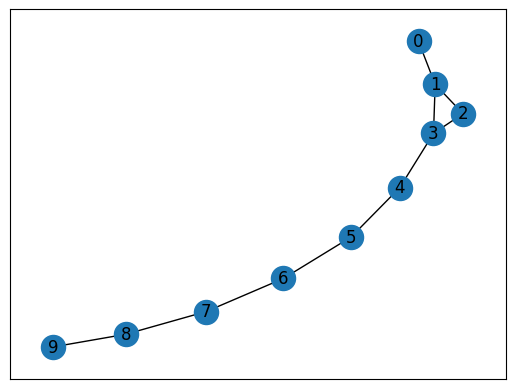

In [106]:
nx.draw_networkx(G)

**Examinar Elementos del Grafo**

In [107]:
#Obtener lista de nodos
print("Nodos:", list(G.nodes))

#Obtener lista de aristas
print("Aristas:", list(G.edges))

#Obtener vecinos de un nodo
print("Vecinos del nodo 1:", list(G.adj[1]))  # Equivalente a list(G.neighbors(1))

#Obtener grado de un nodo
print("Grado del nodo 1:", G.degree[1])

Nodos: [1, 2, 3, 4, 5, 0, 6, 7, 8, 9]
Aristas: [(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
Vecinos del nodo 1: [2, 3, 0]
Grado del nodo 1: 3


**Atributos de Grafos, Nodos y Aristas**

In [108]:
#Atributos del grafo
G = nx.Graph(day="Friday")
G.graph['day'] = "Monday"

#Atributos de nodos
G.add_node(1, time='5pm')
G.nodes[1]['room'] = 714

#Atributos de aristas
G.add_edge(1, 2, weight=4.7)
G[1][2]['weight'] = 5.0  # Modificar atributo existente

**Grafos Dirigidos**

In [110]:
#Crear un grafo dirigido
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])

#Grado de salida y entrada
print("Grado de salida:", DG.out_degree(1, weight='weight'))
print("Grado total:", DG.degree(1, weight='weight'))

#Sucesores y predecesores
print("Sucesores de 1:", list(DG.successors(1)))
print("Predecesores de 1:", list(DG.predecessors(1)))

Grado de salida: 0.5
Grado total: 1.25
Sucesores de 1: [2]
Predecesores de 1: [3]


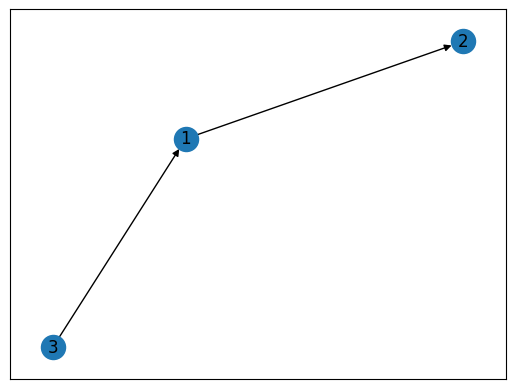

In [112]:
nx.draw_networkx(DG)

**Multigrafos**

In [113]:
#Crear un multigrafo (múltiples aristas entre nodos)
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 3, 0.75), (2, 3, 0.5)])

#Convertir a grafo simple conservando el peso mínimo
GG = nx.Graph()
for n, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        min_value = min(d['weight'] for d in edict.values())
        GG.add_edge(n, nbr, weight=min_value)

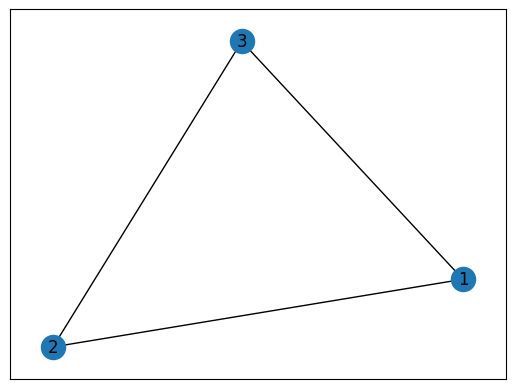

In [116]:
nx.draw_networkx(GG)


**Generadores de Grafos**

In [117]:
#Grafos clásicos
K_5 = nx.complete_graph(5)  #Grafo completo con 5 nodos
K_3_5 = nx.complete_bipartite_graph(3, 5)  #Grafo bipartito completo

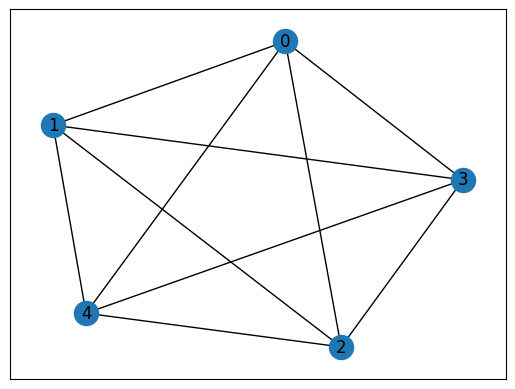

In [118]:
nx.draw_networkx(K_5)


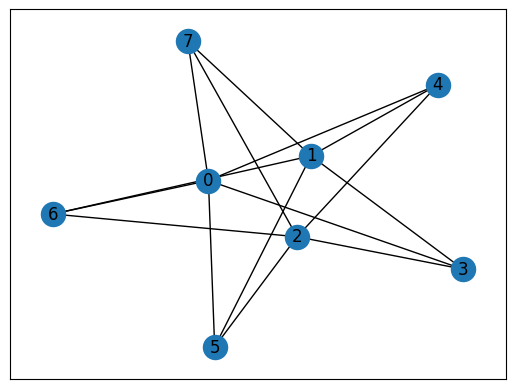

In [119]:
nx.draw_networkx(K_3_5)

In [120]:
#Grafos estocásticos
er = nx.erdos_renyi_graph(100, 0.15)  #Grafo aleatorio de Erdős-Rényi
ws = nx.watts_strogatz_graph(30, 3, 0.1)  #Grafo de mundo pequeño
ba = nx.barabasi_albert_graph(100, 5)  #Grafo de libre escala

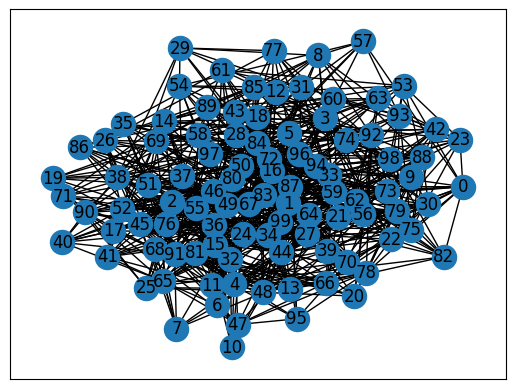

In [121]:
nx.draw_networkx(er)

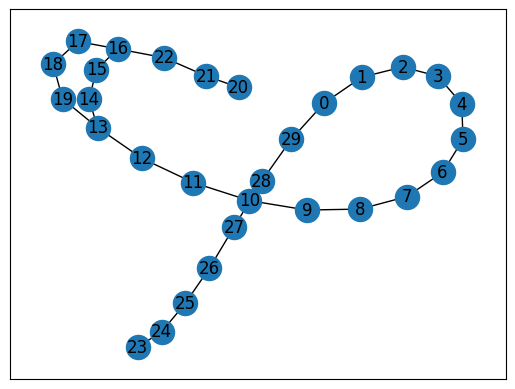

In [122]:
nx.draw_networkx(ws)

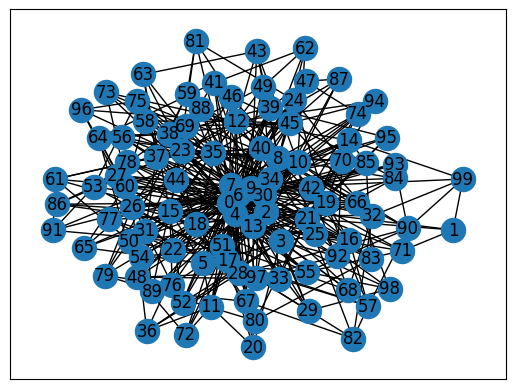

In [123]:
nx.draw_networkx(ba)

**Análisis de Grafos**

Componentes conexas: [{1, 2, 3}, {'spam'}]
Grados: [0, 1, 1, 2]
Coeficientes de clustering: {1: 0, 2: 0, 3: 0, 'spam': 0}
Camino más corto desde nodo 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]}


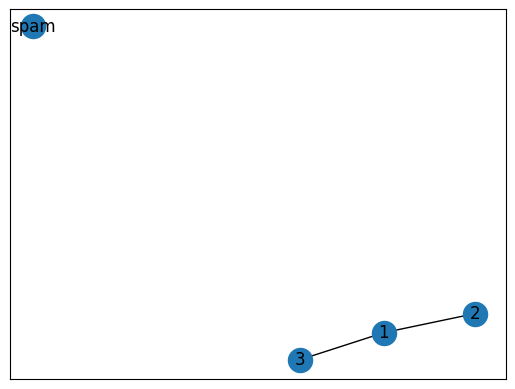

In [125]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")

#Componentes conexas
print("Componentes conexas:", list(nx.connected_components(G)))

#Grados de los nodos
print("Grados:", sorted(d for n, d in G.degree()))

#Coeficiente de clustering
print("Coeficientes de clustering:", nx.clustering(G))

#Todos los caminos más cortos
sp = dict(nx.all_pairs_shortest_path(G))
print("Camino más corto desde nodo 3:", sp[3])

nx.draw_networkx(G)


**Visualización de Grafos**

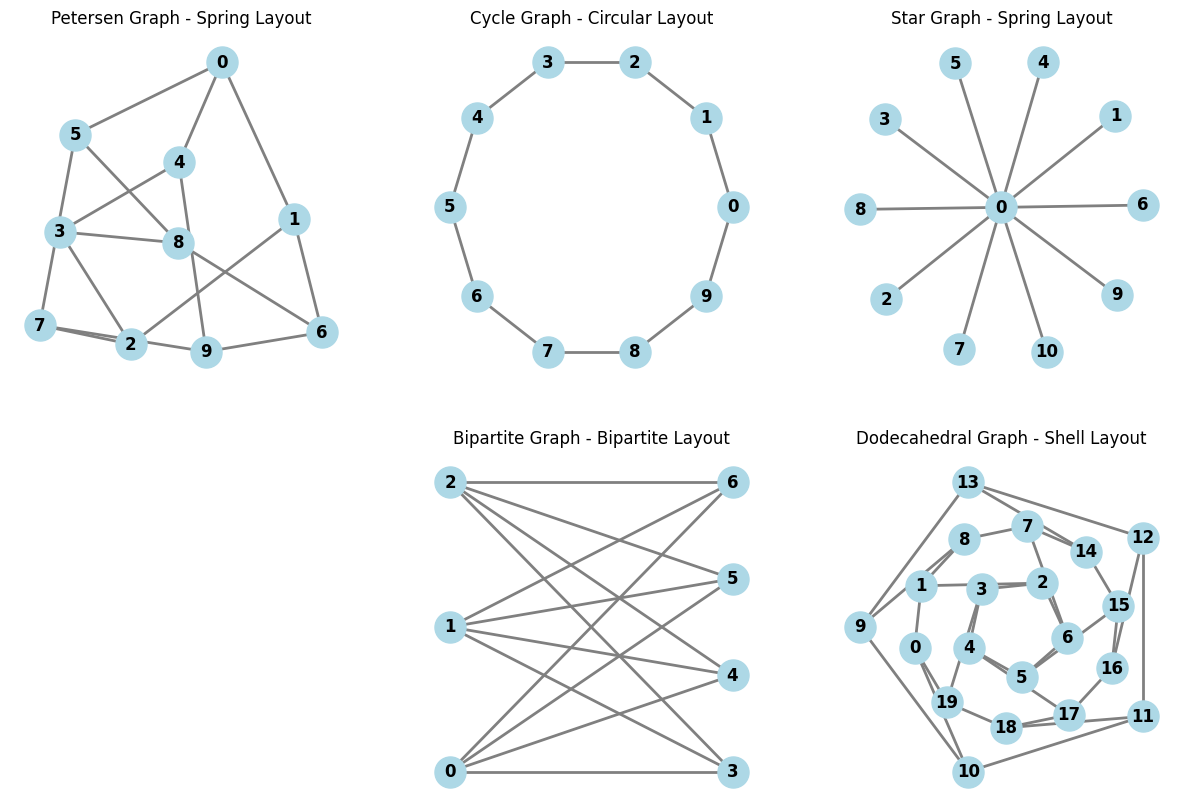

In [127]:
import matplotlib.pyplot as plt

#Configuración común para todos los gráficos
options = {
    'with_labels': True,
    'font_weight': 'bold',
    'node_color': 'lightblue',
    'node_size': 500,
    'width': 2,
    'edge_color': 'gray'
}

plt.figure(figsize=(15, 10))

#Grafo de Petersen
plt.subplot(231)
G = nx.petersen_graph()
pos = nx.spring_layout(G, seed=42)  #seed para reproducibilidad
nx.draw(G, pos, **options)
plt.title("Petersen Graph - Spring Layout")

#Grafo circular
plt.subplot(232)
G = nx.cycle_graph(10)
pos = nx.circular_layout(G)
nx.draw(G, pos, **options)
plt.title("Cycle Graph - Circular Layout")

#Grafo estrella
plt.subplot(233)
G = nx.star_graph(10)
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, **options)
plt.title("Star Graph - Spring Layout")

#Grafo bipartito
plt.subplot(235)
G = nx.complete_bipartite_graph(3, 4)
pos = nx.bipartite_layout(G, nodes=[0, 1, 2])  # Primer conjunto de nodos
nx.draw(G, pos, **options)
plt.title("Bipartite Graph - Bipartite Layout")

#Grafo shell con múltiples capas
plt.subplot(236)
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
pos = nx.shell_layout(G, nlist=shells)
nx.draw(G, pos, **options)
plt.title("Dodecahedral Graph - Shell Layout")

plt.show()

#Conclusion

NetworkX es una librería poderosa para trabajar con grafos en Python.

- Creación de grafos (dirigidos, no dirigidos, multigrafos)

- Manipulación de nodos y aristas

- Adición de atributos

- Generación de grafos clásicos y aleatorios

- Análisis básico de grafos

- Visualización